In [ ]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs

# Ignore warnings to keep the output clean
import warnings
warnings.filterwarnings(action='ignore')


In [2]:
# Reading the dataset from a CSV file
data = pd.read_csv('Restaurant.csv')

# Displaying the first 3 rows of the dataset
data.head(3)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [3]:
# Dropping the 'Restaurant ID' column as it's not needed for analysis
data = data.drop(columns=['Restaurant ID'])

In [4]:
# Displaying information about the dataset, including data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   object 
 1   Country Code          9551 non-null   int64  
 2   City                  9551 non-null   object 
 3   Address               9551 non-null   object 
 4   Locality              9551 non-null   object 
 5   Locality Verbose      9551 non-null   object 
 6   Longitude             9551 non-null   float64
 7   Latitude              9551 non-null   float64
 8   Cuisines              9542 non-null   object 
 9   Average Cost for two  9551 non-null   int64  
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [8]:
# Generating summary statistics for numerical columns (transpose for better readability)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Country Code,9551.0,18.365616,56.750546,1.000000,1.000000,1.000000,1.000000,216.000000
Longitude,9551.0,64.126574,41.467058,-157.948486,77.081343,77.191964,77.282006,174.832089
Latitude,9551.0,25.854381,11.007935,-41.330428,28.478713,28.570469,28.642758,55.976980
Average Cost for two,9551.0,1199.210763,16121.183073,0.000000,250.000000,400.000000,700.000000,800000.000000
Price range,9551.0,1.804837,0.905609,1.000000,1.000000,2.000000,2.000000,4.000000
Aggregate rating,9551.0,2.666370,1.516378,0.000000,2.500000,3.200000,3.700000,4.900000
Votes,9551.0,156.909748,430.169145,0.000000,5.000000,31.000000,131.000000,10934.000000


In [9]:

# Checking for duplicated rows in the dataset
data.duplicated().sum()

0

In [10]:
# Checking for missing values in the dataset
data.isnull().sum()


Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
# Finding the most frequent cuisine type in the 'Cuisines' column
most_frequent_cuisine = data['Cuisines'].mode()[0]

# Filling missing values in the 'Cuisines' column with the most frequent cuisine
data['Cuisines'].fillna(most_frequent_cuisine, inplace=True)


In [6]:
# Checking for missing values in the dataset
data.isnull().sum()


Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

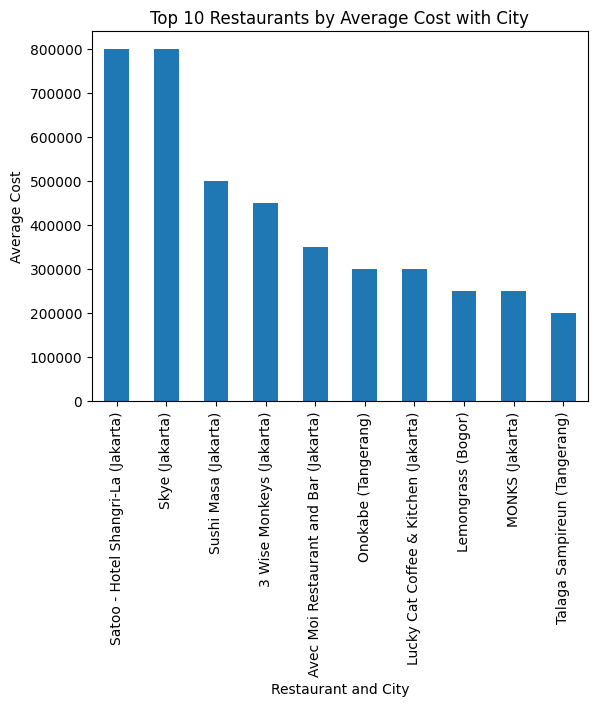

In [7]:
# Importing the plotting library again (if needed in a separate code cell)
import matplotlib.pyplot as plt 

# Selecting the top 10 restaurants with the highest 'Average Cost for two' and sorting in descending order
top_10_restaurants = data[['Restaurant Name', 'City', 'Average Cost for two']].sort_values(by='Average Cost for two', ascending=False).head(10)

# Creating a new column that combines the restaurant name and city for better labeling
top_10_restaurants['Restaurant and City'] = top_10_restaurants['Restaurant Name'] + ' (' + top_10_restaurants['City'] + ')'

# Setting 'Restaurant and City' as the index and plotting the 'Average Cost for two' as a bar chart
top_10_restaurants.set_index('Restaurant and City')['Average Cost for two'].plot(kind='bar')

# Adding a title and labels to the plot
plt.title('Top 10 Restaurants by Average Cost with City')
plt.ylabel('Average Cost')

# Displaying the plot
plt.show()


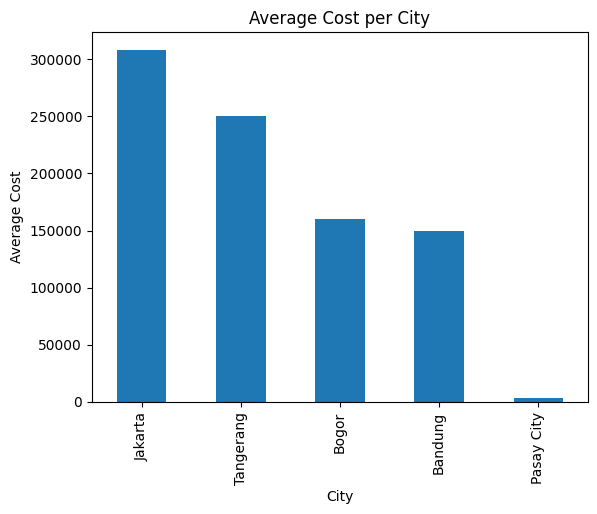

In [14]:
# Grouping the data by 'City' and calculating the mean 'Average Cost for two' for each city
# Sorting the results in descending order and selecting the top 5 cities with the highest average cost
data.groupby('City')['Average Cost for two'].mean().sort_values(ascending=False).head().plot(kind='bar')

# Adding a title and labels to the bar plot
plt.title('Average Cost per City')
plt.ylabel('Average Cost')

# Displaying the plot
plt.show()


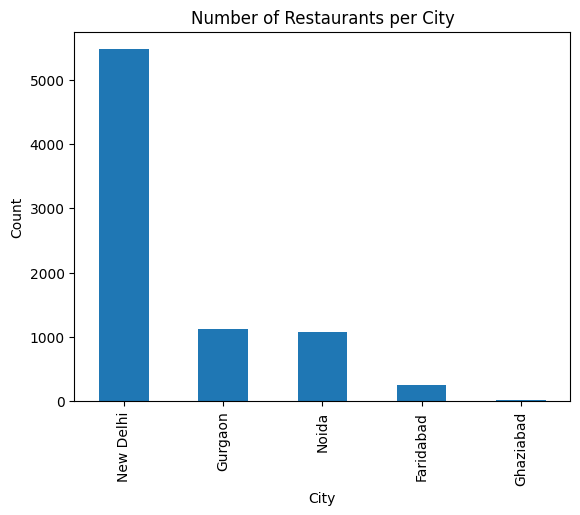

In [24]:
# Counting the number of restaurants in each city and selecting the top 5 cities
data['City'].value_counts().head().plot(kind='bar')

# Adding a title and labels to the bar plot
plt.title('Number of Restaurants per City')
plt.ylabel('Count')

# Displaying the plot
plt.show()


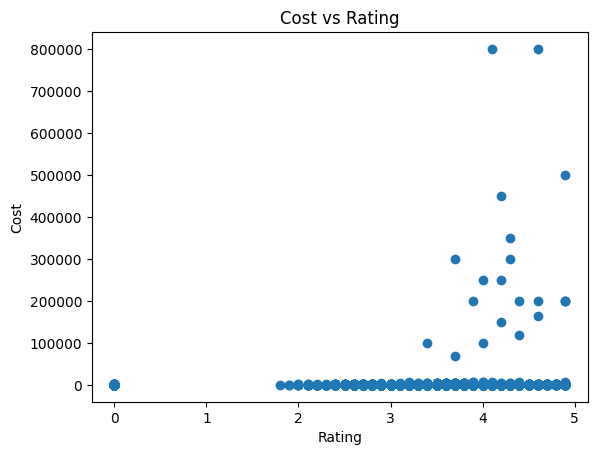

In [25]:
# Creating a scatter plot to show the relationship between 'Aggregate rating' and 'Average Cost for two'
plt.scatter(data['Aggregate rating'], data['Average Cost for two'])

# Adding a title and labels for the axes
plt.title('Cost vs Rating')
plt.xlabel('Rating')
plt.ylabel('Cost')

# Displaying the plot
plt.show()


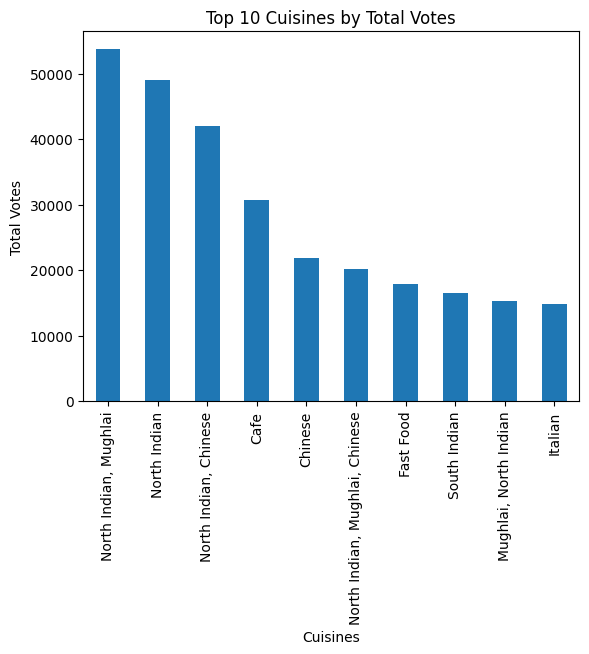

In [26]:
top_cuisines = data.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head(10)
top_cuisines.plot(kind='bar')
plt.title('Top 10 Cuisines by Total Votes')
plt.ylabel('Total Votes')
plt.xlabel('Cuisines')  
plt.show()

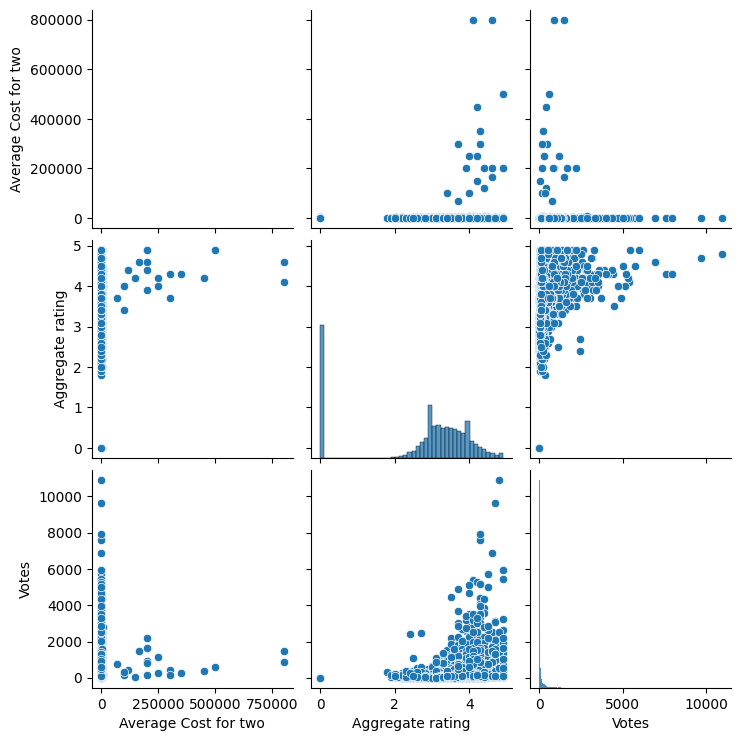

In [27]:
sns.pairplot(data[['Average Cost for two','Aggregate rating','Votes']]);

In [8]:
data['Rating text'].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

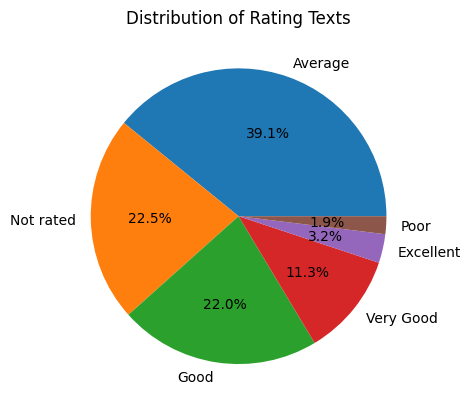

In [9]:
rating_counts = data['Rating text'].value_counts()

# Pasta diaqramını yaratmaq
rating_counts.plot(kind='pie', autopct='%1.1f%%') 
plt.ylabel('')  
plt.title('Distribution of Rating Texts')  
plt.show()

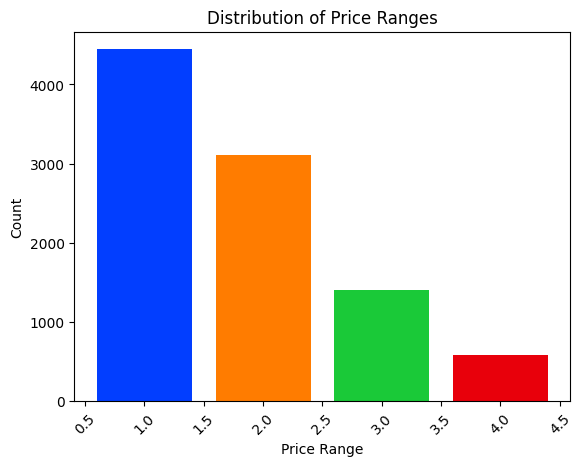

In [10]:
price_range_counts = data['Price range'].value_counts()
colors = sns.color_palette("bright", len(price_range_counts))
plt.bar(price_range_counts.index, price_range_counts.values, color=colors)
plt.xlabel('Price Range')  
plt.ylabel('Count') 
plt.title('Distribution of Price Ranges') 
plt.xticks(rotation=45)

plt.show()

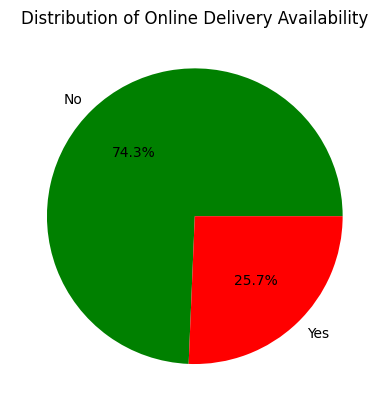

In [11]:
online_delivery_counts = data['Has Online delivery'].value_counts()
online_delivery_counts.plot(kind='pie', autopct='%1.1f%%', colors=['g','r'])
plt.title('Distribution of Online Delivery Availability')
plt.ylabel('')
plt.show()


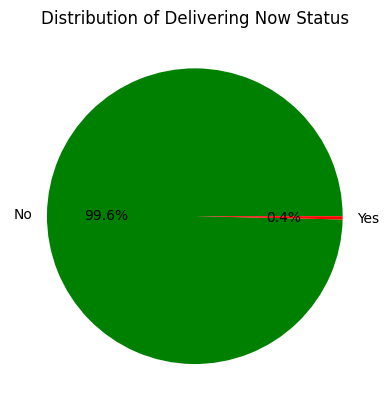

In [12]:
delivering_now_counts = data['Is delivering now'].value_counts()
delivering_now_counts.plot(kind='pie', autopct='%1.1f%%', colors=['g','r'])
plt.title('Distribution of Delivering Now Status')
plt.ylabel('')
plt.show()


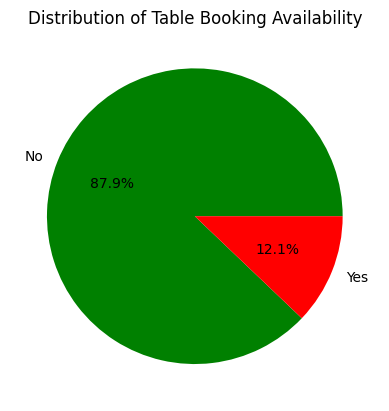

In [13]:
table_booking_counts = data['Has Table booking'].value_counts()
table_booking_counts.plot(kind='pie', autopct='%1.1f%%', colors=['g','r'])
plt.title('Distribution of Table Booking Availability')
plt.ylabel('')
plt.show()


In [14]:
# Selecting columns with numeric data types (integer and float)
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Selecting columns with categorical data types (object and category)
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Creating a DataFrame containing only the numeric columns
data_numeric = data[numeric_columns]

# Creating a DataFrame containing only the categorical columns
data_categorical = data[categorical_columns]


In [15]:
data_numeric.head()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
0,162,121.027535,14.565443,1100,3,4.8,314
1,162,121.014101,14.553708,1200,3,4.5,591
2,162,121.056831,14.581404,4000,4,4.4,270
3,162,121.056475,14.585318,1500,4,4.9,365
4,162,121.057508,14.584450,1500,4,4.8,229


In [16]:
data_categorical.head(3)

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
0,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent
1,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent
2,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,Green,Very Good


In [17]:
# Importing the stats module from scipy for statistical functions
import scipy.stats as stats

# Defining a function to identify features with outliers in the given DataFrame
def identify_features(data_frame=None):
    f_outliers = []  # List to store features with outliers

    # Looping through each numeric feature in the DataFrame
    for feature in data_numeric:
        # Calculating the z-scores for the feature and identifying outliers (z-score >= 3)
        zscores = np.where(stats.zscore(a=data_frame[feature], nan_policy="omit").abs() >= 3, 1, 0)

        # If any outliers are found, add the feature to the outliers list
        if 1 in zscores:
            f_outliers.append(feature)
    else:
        pass  # Placeholder for future logic (if needed)

    return f_outliers  # Returning the list of features with outliers


In [18]:
features = identify_features(data_frame=data_numeric)
features

['Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Votes']

In [19]:
# This function applies the IQR method to limit outliers in specified features of the given DataFrame.
def apply_iqr(data_frame=None):
    for feature in features:
        Q3 = data_frame[feature].quantile(q=0.75)  # Calculate the third quartile
        Q1 = data_frame[feature].quantile(q=0.25)   # Calculate the first quartile
        IQR = Q3 - Q1  # Calculate the interquartile range
        outlier_range = IQR * 1.5  # Determine the outlier range
        upperlimit = Q3 + outlier_range  # Calculate the upper limit for outliers
        lowerlimit = Q1 - outlier_range  # Calculate the lower limit for outliers
        # Replace values above upper limit with upper limit and below lower limit with lower limit
        data_frame[feature] = np.where(data_frame[feature] >= upperlimit, upperlimit, data_frame[feature])
        data_frame[feature] = np.where(data_frame[feature] <= lowerlimit, lowerlimit, data_frame[feature])

    return data_frame  # Return the modified DataFrame


In [20]:
features = data_numeric.columns
data_numeric = apply_iqr(data_numeric)


In [21]:
import scipy.stats as stats 


def identify_features(data_frame = None):
    f_outliers = []

    for feature in data_numeric:
        zscores = np.where(stats.zscore(a = data_frame[feature] , nan_policy="omit").abs()>=3,1,0)

        if 1 in zscores:
            f_outliers.append(feature)
    else:
        pass

    return f_outliers

features = identify_features(data_frame=data_numeric)
features

[]

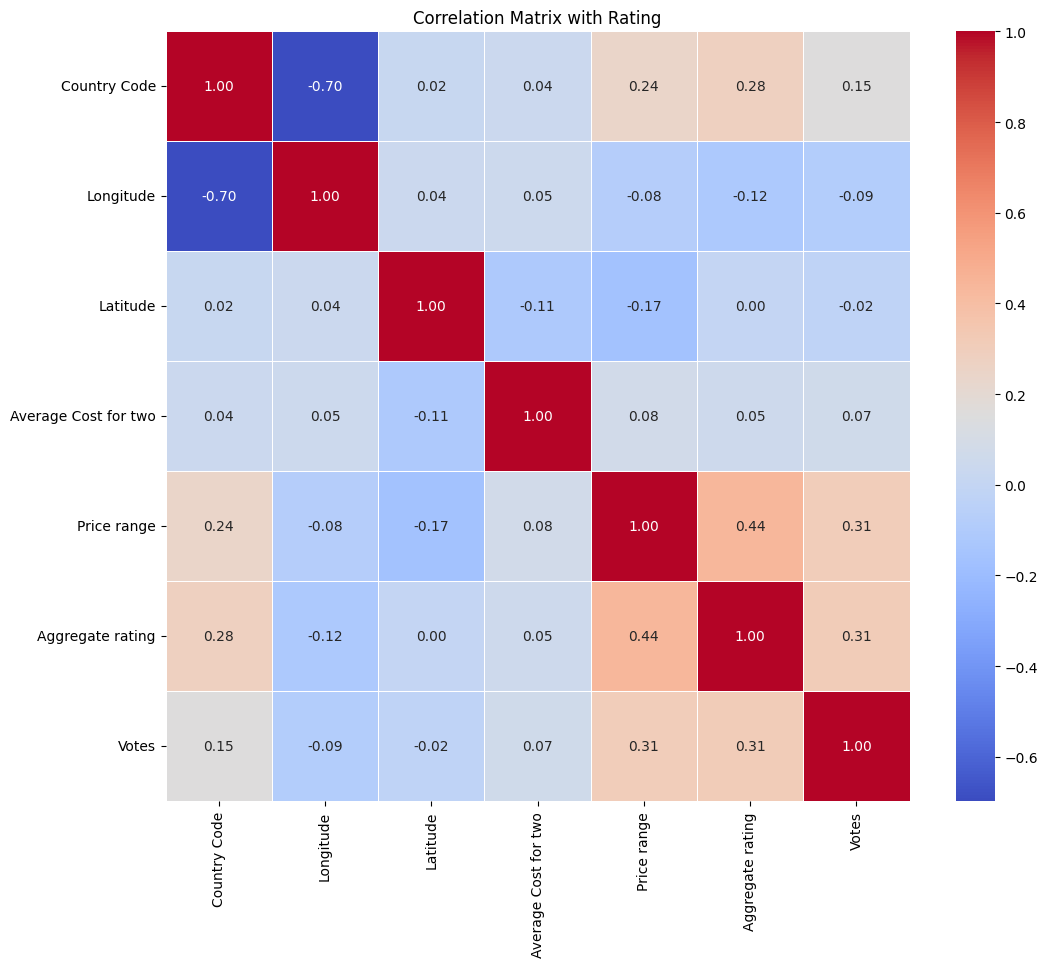

In [22]:
# Calculating the correlation matrix for numeric columns in the dataset
corr_matrix = data[numeric_columns].corr()

# Setting the size of the figure for the heatmap
plt.figure(figsize=(12, 10))

# Creating a heatmap to visualize the correlation matrix with annotations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Adding a title to the heatmap
plt.title('Correlation Matrix with Rating')

# Displaying the heatmap
plt.show()


In [44]:
data_numeric.columns

Index(['Country Code', 'Longitude', 'Latitude', 'Average Cost for two',
       'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

In [23]:
data = data.drop(columns=['Country Code', 'Longitude', 'Latitude'])


In [24]:
data.head()

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,Ooma,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,Sambo Kojin,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [25]:
# Importing necessary libraries for feature selection, model training, and preprocessing
from sklearn.feature_selection import RFE  # Recursive Feature Elimination for feature selection
from sklearn.ensemble import RandomForestRegressor  # Random Forest model for regression
from sklearn.pipeline import Pipeline  # For creating a pipeline of processing steps
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder  # Preprocessing techniques
from sklearn.compose import ColumnTransformer  # For applying different transformations to different columns
from sklearn.impute import SimpleImputer  # For handling missing values

# Defining categorical features in the dataset
categorical_features = ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
                        'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
                        'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']

# Defining numeric features in the dataset
numeric_features = ['Average Cost for two', 'Price range', 'Votes']

# Combining all features into a single list for use in model training
features = ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
            'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
            'Is delivering now', 'Switch to order menu', 'Rating color',
            'Rating text', 'Average Cost for two', 'Price range', 'Votes']

# Preparing the feature matrix (X) by dropping the target variable 'Aggregate rating'
X = data.drop(columns=['Aggregate rating'])

# Defining the target variable (y) as 'Aggregate rating'
y = data['Aggregate rating']


In [26]:
# Importing necessary libraries for model training, evaluation, and hyperparameter optimization
import optuna  # Library for hyperparameter optimization
from sklearn.model_selection import train_test_split, cross_val_score  # Functions for splitting data and cross-validation
from sklearn.metrics import mean_squared_error, r2_score  # Metrics for evaluating model performance
from sklearn.pipeline import Pipeline  # For creating a pipeline of processing steps
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Preprocessing techniques
from sklearn.compose import ColumnTransformer  # For applying different transformations to different columns
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.ensemble import RandomForestRegressor  # Random Forest model for regression
import numpy as np  # Importing NumPy for numerical operations

# Splitting the dataset into training and testing sets (80% train, 20% test) with a fixed random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Defining the objective function for hyperparameter optimization using Optuna
def objective(trial):
    # Setting up a preprocessor that applies different transformations to numeric and categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            # Processing numeric features: imputing missing values with the median and scaling
            ('num', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with the median
                ('scaler', StandardScaler())  # Scale numeric features
            ]), numeric_features),
            
            # Processing categorical features: imputing with the most frequent value and one-hot encoding
            ('cat', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
                ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
            ]), categorical_features)
        ]
    )

    # Creating a Random Forest Regressor model with hyperparameters to be tuned
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),  # Apply preprocessing steps
        ('regressor', RandomForestRegressor(
            n_estimators=trial.suggest_int('n_estimators', 50, 200),  # Number of trees in the forest
            max_depth=trial.suggest_int('max_depth', 5, 30),  # Maximum depth of the tree
            min_samples_split=trial.suggest_int('min_samples_split', 2, 10),  # Minimum samples required to split an internal node
            min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 10)  # Minimum samples required to be at a leaf node
        ))
    ])

    # Fitting the model to the training data
    model.fit(X_train, y_train)

    # Making predictions on the test data
    predictions = model.predict(X_test)

    # Calculating mean squared error and R² score for the predictions
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    return mse  # Returning the mean squared error for optimization



In [29]:

# Creating an Optuna study to optimize hyperparameters, minimizing the objective function
study = optuna.create_study(direction='minimize')

# Running the optimization process for a specified number of trials
study.optimize(objective, n_trials=10)

# Printing the best hyperparameters found during optimization
print('Ən yaxşı hiperparametrlər:', study.best_params)

# Printing the best mean squared error (MSE) achieved with the optimal hyperparameters
print('Ən yaxşı qiymət (MSE):', study.best_value)


[I 2024-08-12 09:38:04,173] A new study created in memory with name: no-name-8fc24774-718d-42fc-8eb1-bd7fd0dae629
[I 2024-08-12 09:38:51,211] Trial 0 finished with value: 0.028340095811228542 and parameters: {'n_estimators': 124, 'max_depth': 14, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.028340095811228542.
[I 2024-08-12 09:39:09,910] Trial 1 finished with value: 0.029157329289878728 and parameters: {'n_estimators': 63, 'max_depth': 15, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.028340095811228542.
[I 2024-08-12 09:40:33,401] Trial 2 finished with value: 0.029149865421715243 and parameters: {'n_estimators': 194, 'max_depth': 24, 'min_samples_split': 3, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.028340095811228542.
[I 2024-08-12 09:41:17,859] Trial 3 finished with value: 0.028949161700496988 and parameters: {'n_estimators': 161, 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is tri

Ən yaxşı hiperparametrlər: {'n_estimators': 124, 'max_depth': 14, 'min_samples_split': 10, 'min_samples_leaf': 1}
Ən yaxşı qiymət (MSE): 0.028340095811228542


In [30]:
# Retrieving the best hyperparameters found during the optimization process
best_params = study.best_params
print(best_params)  # Printing the best hyperparameters

# Setting up a preprocessor that applies transformations to numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        # Processing numeric features: imputing missing values with the median and scaling
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with the median
            ('scaler', StandardScaler())  # Scale numeric features
        ]), numeric_features),
        
        # Processing categorical features: imputing with the most frequent value and one-hot encoding
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
        ]), categorical_features)
    ]
)

# Creating a new model pipeline with the preprocessor and a Random Forest Regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing steps
    ('regressor', RandomForestRegressor(
        n_estimators=best_params['n_estimators'],  # Using the best number of trees
        max_depth=best_params['max_depth'],  # Using the best maximum depth
        min_samples_split=best_params['min_samples_split'],  # Using the best minimum samples to split
        min_samples_leaf=best_params['min_samples_leaf']  # Using the best minimum samples per leaf
    ))
])


{'n_estimators': 124, 'max_depth': 14, 'min_samples_split': 10, 'min_samples_leaf': 1}


In [31]:
# Fitting the model on the training data for evaluation on the test set
model.fit(X_train, y_train)

# Making predictions on the test set
test_predictions = model.predict(X_test)

# Calculating the R² score for the test set predictions
test_r2 = r2_score(y_test, test_predictions)

# Applying k-fold cross-validation to evaluate model performance
cv_mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')  # Getting negative MSE scores
cv_r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # Getting R² scores

# Calculating the mean cross-validated MSE and R² scores
mean_cv_mse = -np.mean(cv_mse_scores)  # Converting back from negative MSE
mean_cv_r2 = np.mean(cv_r2_scores)  # Calculating the mean R² score

# Printing the mean cross-validated MSE, mean R², and test set R² score
print(f"Kross-validation orta MSE: {mean_cv_mse}")
print(f"Kross-validation orta R^2: {mean_cv_r2}")
print(f"Test dəstində R^2: {test_r2}")



Kross-validation orta MSE: 0.02990082793696766
Kross-validation orta R^2: 0.9860613000857485
Test dəstində R^2: 0.9875426259428083


In [36]:
# Importing the joblib library for saving and loading Python objects
import joblib

# Saving the trained model to a file using joblib for future use
joblib.dump(model, 'restaurant_rating_predictor.pkl')


['restaurant_rating_predictor.pkl']